# Mushrooms!
#### "Leaves of three, let me be" helps you stay away from poison oak, but how do you avoid poison mushrooms?

In [2]:
# data analysis and wrangling
import csv
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt

%matplotlib inline

**Convert** .txt mushroom data to csv file

In [3]:
#with open('agaricus-lepiota.txt', 'r') as in_file:
 #   stripped = (line.strip() for line in in_file)
#  lines = (line.split(",") for line in stripped if line)
   # with open('data.csv', 'w') as out_file:
#       writer = csv.writer(out_file)
#       writer.writerow(('classification', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
 #                        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                         #'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                        #'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
    #'spore-print-color', 'population', 'habitat'))
#      writer.writerows(lines)

### Note from Erin

I added an index column after converting from .txt to .csv 

Use the .csv file from our project folder rather using the one created by the command above

### Bernoulli Naive Bayes Practice

In [4]:
#Not sure what this import is for exactly
import sklearn.datasets as ds

#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

In [5]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

clf = BernoulliNB()
clf.fit(X, y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print(clf.predict(X[2:3]))



[3]


### Exploratory Data Analysis

**Read shroom data file **

In [6]:
shroom = pd.read_csv("data.csv", index_col='index')

**Display** features (Column headers)

In [7]:
print(shroom.columns.values)

['classification' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat']


In [8]:
shroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 1 to 8124
Data columns (total 23 columns):
classification              8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [9]:
len(shroom)

8124

In [10]:
shroom.head()

,classification,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
index,,,,,,,,,,,,,,,,,,,,,
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Note**
Attributes to remove (Columns) because stdev = ~0 (almost all mushrooms same)
* gill-attachment
* stalk-color-above-ring 
* stalk-color-below-ring
* veil-type (stdev = 0, ALL mushrooms type s)
* veil-color
* ring-number


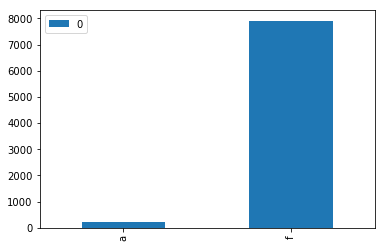

In [11]:
from collections import Counter

letter_counts = Counter(shroom["gill-attachment"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

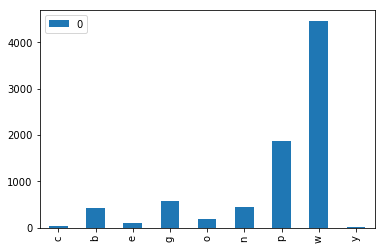

In [12]:
# Distribution for stalk-color-above-ring
letter_counts = Counter(shroom["stalk-color-above-ring"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

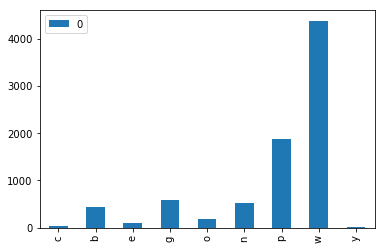

In [13]:
# Distribution for stalk-color-below-ring
stalk_color_below_ring_counts = Counter(shroom["stalk-color-below-ring"])
df = pd.DataFrame.from_dict(stalk_color_below_ring_counts, orient='index')
df.plot(kind="bar")

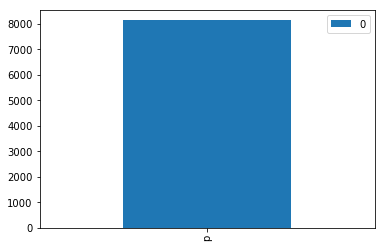

In [14]:
# Distribution for veil-type
letter_counts = Counter(shroom["veil-type"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

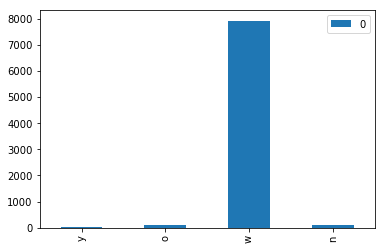

In [15]:
# Distribution for veil-color
letter_counts = Counter(shroom["veil-color"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

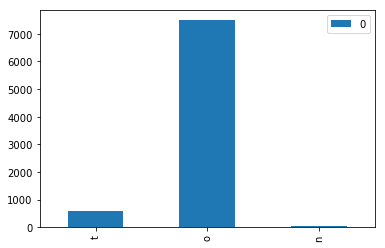

In [16]:
# Distribution for ring-number
letter_counts = Counter(shroom["ring-number"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

In [17]:
print(stalk_color_below_ring_counts)

Counter({'w': 4384, 'p': 1872, 'g': 576, 'n': 512, 'b': 432, 'o': 192, 'e': 96, 'c': 36, 'y': 24})


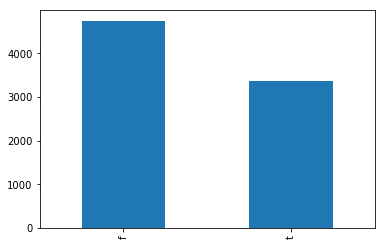

In [18]:
shroom.bruises.value_counts().plot(kind='bar')

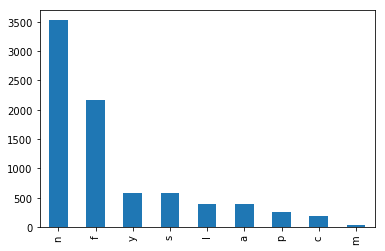

In [19]:
shroom.odor.value_counts().plot(kind='bar')

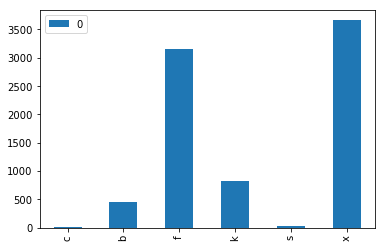

In [20]:
letter_counts = Counter(shroom["cap-shape"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

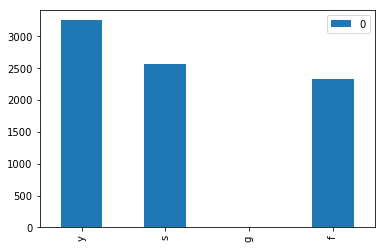

In [21]:
letter_counts = Counter(shroom["cap-surface"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

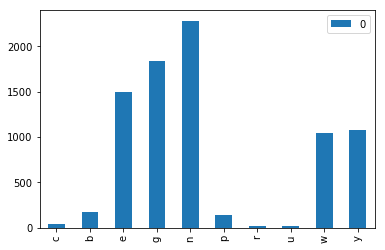

In [22]:
letter_counts = Counter(shroom["cap-color"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

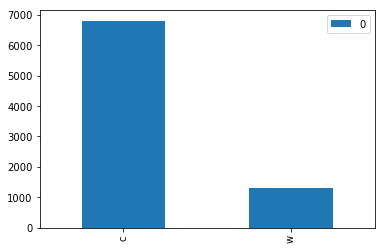

In [23]:
letter_counts = Counter(shroom["gill-spacing"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

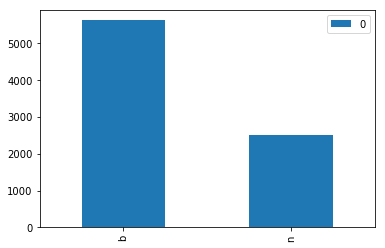

In [24]:
letter_counts = Counter(shroom["gill-size"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

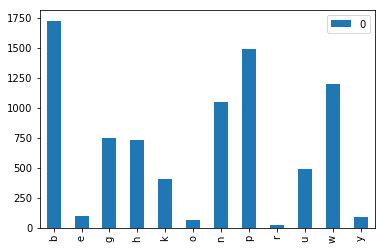

In [25]:
letter_counts = Counter(shroom["gill-color"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

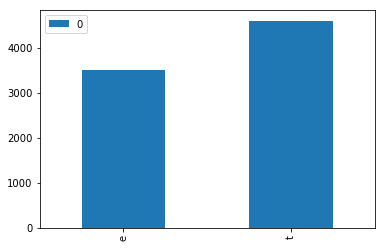

In [26]:
letter_counts = Counter(shroom["stalk-shape"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

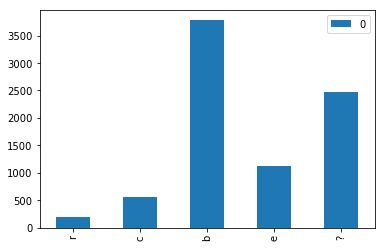

In [27]:
letter_counts = Counter(shroom["stalk-root"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

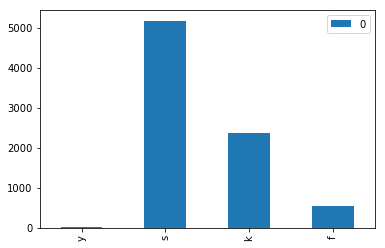

In [28]:
letter_counts = Counter(shroom["stalk-surface-above-ring"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

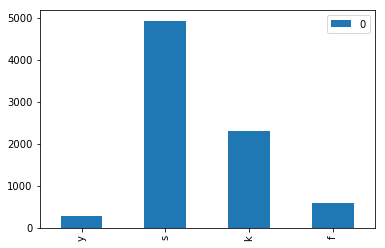

In [29]:
letter_counts = Counter(shroom["stalk-surface-below-ring"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

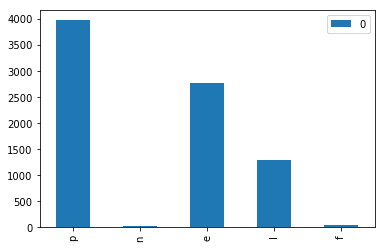

In [30]:
letter_counts = Counter(shroom["ring-type"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

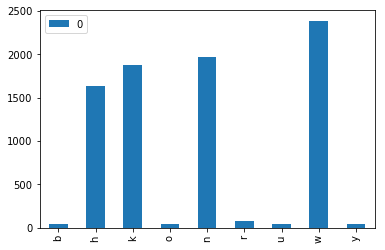

In [31]:
letter_counts = Counter(shroom["spore-print-color"])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind="bar")

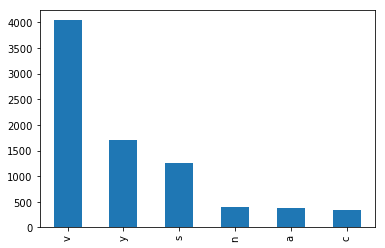

In [32]:
shroom.population.value_counts().plot(kind='bar')

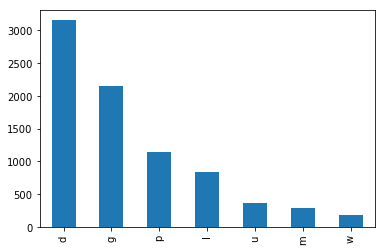

In [33]:
shroom.habitat.value_counts().plot(kind='bar')